## Curso Python para Economistas
### Trabajo Práctico Nº 6 (integrador)

### Fecha de entrega:
Martes 12/11 a las 23:59 hs\*

\* *tienen una semana más que lo usual para resolver este TP*

### Modalidad de entrega y trabajo
- Este TP es **individual**.
- Un repositorio **privado** debe ser creado en GitHub para el TP, y dar acceso a los 5 profesores. Los nombres de usuarios son: `belenmichel`, `rbonazzola`, `Queeno11`, `agoszulli` y `pilarch`.
- Cuando hayan hecho ese último commit, copien la URL para clonar su repositorio y péguenla en
[este Google Sheet](https://docs.google.com/spreadsheets/d/1byFOKyV7UnBuPuF9X2JWFVOUZX36b2_CEDw9ColP7VQ/edit?usp=sharing), en la hoja del TP6. Al ser un repositorio privado, solo los colaboradores habilitados podrán clonarlo.
- Al finalizar el trabajo práctico deben hacer un último commit y push en su repositorio de GitHub con el mensaje `"Entrega final del TP6"`. Antes de la fecha y hora de entrega pueden hacer cuantos cambios quieran en el repositorio, pero luego de la hora de corte no deben hacer más cambios. Si un commit con el mensaje anterior se realiza luego de la hora de entrega, se supondrá que la entrega tardía fue intencional y se utilizarán los días de gracia. La última versión en el repositorio es la que será evaluada. Para esto es importante que no completen el Google Sheet hasta que no hayan finalizado el TP, como tampoco hacer pushes posteriores a la entrega.
- Comentar su código y utilizar buenas prácticas en el estilo del mismo tendrá un peso en la nota de este trabajo (1pto por inciso). Pueden utilizar esta [guía de estilo](https://recursospython.com/pep8es.pdf) como referencia.

## Consignas

#### Parte 1:
Esta parte del trabajo es abierta: los detalles de las consignas no están definidas al 100% y deberán usar sus intereses y criterios para guiarlos.
El objetivo de esta parte es que pongan a prueba las habilidades desarrolladas para conectarse a una API REST que sea de su interés. Nuestra sugerencia es que comiencen a pensar en datos con los cuales les gustaría trabajar en sus tesis y que exploren nuevas páginas web y datos con los que no han trabajado anteriormente. 

1. **Elección de una API REST** (5 puntos): Elijan una API pública que sea de interés para ustedees y justifiquen por qué les resulta interesante trabajar con los datos de esa API. Detallen la pregunta de investigación que les gustaría responder con esos datos. 

   Aquí tienen algunas sugerencias:

- [API de datos.gob.ar](https://datos.gob.ar/apis) (datos de Argentina)
- [IDB API](https://mydata.iadb.org/) (indicadores económicos y + de America Latina y el Caribe)
- [World Bank API](https://data.worldbank.org/indicator) (indicadores económicos globales)
- O pueden buscar otras APIs en [este link](https://github.com/public-apis/)

#Eleccion del API REST: World Bank API

El Banco Mundial ofrece una API que permite la búsqueda y recuperación de documentos públicos disponibles en su sitio de Documentos e Informes. Estos registros se pueden obtener en un formato útil para la investigación y para su inclusión en sitios web ajenos al Banco Mundial. Fuente: Documento API.

He elegido utilizar la API del Banco Mundial porque brinda acceso a datos de alta calidad sobre países de todo el mundo. Esto facilita la comparación y el análisis de diversas variables.

Mi interés se centra en investigar si existe una relación entre el crecimiento del PIB y las emisiones de CO2 en Argentina. Utilizando datos de la API del Banco Mundial, planeo analizar cómo el aumento del PIB —como medida del desarrollo económico— se correlaciona con las emisiones de dióxido de carbono, un indicador clave del impacto ambiental de este crecimiento. La disponibilidad de datos confiables y homogéneos del Banco Mundial permitirá realizar un análisis riguroso para determinar si el desarrollo económico en Argentina ha ido acompañado de un incremento en las emisiones de CO2, o si, por el contrario, existe algún tipo de desacoplamiento entre crecimiento económico y sostenibilidad ambiental.

2. **Conectar con la API y extraer datos** (5 puntos)
    - Hagan una solicitud a la API utilizando el módulo `requests` de Python.
    - Definan parámetros adecuados para obtener un conjunto de datos relevante para el uso que has planteado.
    - Asegúrense de manejar correctamente el caso en que la solicitud falle (por ejemplo, con un mensaje de error o un valor predeterminado).

In [ ]:
pip install requests
pip install tabula-py
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 4.2 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.0 MB 4.6 MB/s eta 0:00:03
   ----------- ---------------------------- 3.1/11.0 MB 5.0 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/11.0 MB 5.4 MB/s eta 0:00:02
   -------------------- ------------------- 5.5/11.0 MB 5.3 MB/s eta 0:00:02
   ------------------------- -------------- 7.1/11.0 MB 5.6 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.0 MB 5.8 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/11.0 MB 5.9 MB/s eta 0:00:01
   ------------------------------------ --- 10.0/11.0 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 4.8 MB/s eta 0:00:00
  


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import requests
import pandas as pd

In [2]:
# Elijo ndicadores específicos de interes para Argentina
EMISIONES_CO2_ARG = "EN.GHG.CO2.PC.CE.AR5"  # Emisiones de CO2 per cápita  
PBI_ARG = "NY.GDP.MKTP.CD"  # Producto Interno Bruto (PIB)  

# País y rango de años  
COUNTRY_CODE = "AR"  # Código del país (Argentina)  
START_YEAR = 2002  
END_YEAR = 2024  

# Función para obtener datos del Banco Mundial  
def get_worldbank_data(country_code, indicator, start_year, end_year):  
    url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/{indicator}"  
    params = {  
        "date": f"{start_year}:{end_year}",  
        "format": "json"  
    }  
    response = requests.get(url, params=params)  
    if response.status_code == 200:  
        data = response.json()  
        # Verifica si hay datos válidos  
        if len(data) > 1 and isinstance(data[1], list):  
            # Filtra los datos válidos  
            valid_data = [entry for entry in data[1] if entry.get('value') is not None]  
            if not valid_data:  
                print(f"No hay datos disponibles para el indicador {indicator}.")  
            return valid_data  
        else:  
            print(f"La respuesta de la API no contiene datos válidos para el indicador {indicator}.")  
            return []  
    else:  
        print(f"Error al conectar con la API: {response.status_code}")  
        return []  

# Obtengo datos de emisiones de CO2 para Argentina
print("Obteniendo datos de emisiones de CO2...")  
emisiones_data = get_worldbank_data(COUNTRY_CODE, EMISIONES_CO2_ARG, START_YEAR, END_YEAR)  

# Obtengo datos de PIB de Argentina 
print("Obteniendo datos del PIB...")  
pbi_data = get_worldbank_data(COUNTRY_CODE, PBI_ARG, START_YEAR, END_YEAR)  

# Muestro los datos obtenidos  
print("\nDatos de Emisiones de CO2 de Argentina:")  
if emisiones_data:  
    for entry in emisiones_data:  
        year = entry['date']  
        value = entry['value']  
        print(f"Año {year}: {value:.2f} toneladas de CO2 per cápita")  
else:  
    print("No se encontraron datos de emisiones de CO2.")  

print("\nDatos del PIB de Argentina:")  
if pbi_data:  
    for entry in pbi_data:  
        year = entry['date']  
        value = entry['value']  
        print(f"Año {year}: ${value:,.2f}")  
else:  
    print("No se encontraron datos del PIB.")

Obteniendo datos de emisiones de CO2...
Obteniendo datos del PIB...

Datos de Emisiones de CO2 de Argentina:
Año 2022: 3.98 toneladas de CO2 per cápita
Año 2021: 3.96 toneladas de CO2 per cápita
Año 2020: 3.61 toneladas de CO2 per cápita
Año 2019: 3.95 toneladas de CO2 per cápita
Año 2018: 4.19 toneladas de CO2 per cápita
Año 2017: 4.28 toneladas de CO2 per cápita
Año 2016: 4.39 toneladas de CO2 per cápita
Año 2015: 4.49 toneladas de CO2 per cápita
Año 2014: 4.40 toneladas de CO2 per cápita
Año 2013: 4.54 toneladas de CO2 per cápita
Año 2012: 4.45 toneladas de CO2 per cápita
Año 2011: 4.47 toneladas de CO2 per cápita
Año 2010: 4.30 toneladas de CO2 per cápita
Año 2009: 4.02 toneladas de CO2 per cápita
Año 2008: 4.39 toneladas de CO2 per cápita
Año 2007: 4.30 toneladas de CO2 per cápita
Año 2006: 4.10 toneladas de CO2 per cápita
Año 2005: 3.91 toneladas de CO2 per cápita
Año 2004: 3.85 toneladas de CO2 per cápita
Año 2003: 3.50 toneladas de CO2 per cápita
Año 2002: 3.24 toneladas de CO2

3. a) **Convertir los datos a un DataFrame de pandas** (5 puntos)
- Conviertan la respuesta de la API a un `DataFrame` de pandas.
- Verifiquen el formato de los datos y asegúrense de que están listos para su análisis.
- Incluyan las columnas necesarias para identificar el origen de los datos (por ejemplo, país, fecha, nombre del activo, etc.).

3. b) **Realizar una transformación de los datos** (5 puntos)

Apliquen alguna transformación relevante, como:
- Preservar sólo datos de un período específico o de un lugar específico.
- Crear una columna calculada (por ejemplo, una tasa de cambio o promedio).
- Convertir unidades de medida o redondear valores.
- Eliminar registros con datos faltantes.

In [ ]:
#############################################
PREGUNTA A
#############################################

In [3]:
# Obtengo los datos de emisiones de CO2 y PIB  
emisiones_data = get_worldbank_data(COUNTRY_CODE, EMISIONES_CO2_ARG, START_YEAR, END_YEAR)  
pbi_data = get_worldbank_data(COUNTRY_CODE, PBI_ARG, START_YEAR, END_YEAR)  

# Convierto los datos a DataFrames de pandas  
df_emisiones = pd.DataFrame(emisiones_data)  
df_pbi = pd.DataFrame(pbi_data)  

# Aseguro los DataFrames tengan las columnas necesarias  
df_emisiones.rename(columns={'date': 'Año', 'value': 'Emisiones_CO2_PC', 'indicator': 'Indicador', 'country': 'Pais'}, inplace=True)  
df_pbi.rename(columns={'date': 'Año', 'value': 'PIB', 'indicator': 'Indicador', 'country': 'Pais'}, inplace=True)  

In [4]:
# Muestro los DataFrames de Emisiones de CO2
print("DataFrame de Emisiones de CO2:")  
print(df_emisiones)  

DataFrame de Emisiones de CO2:
                                            Indicador  \
0   {'id': 'EN.GHG.CO2.PC.CE.AR5', 'value': 'Carbo...   
1   {'id': 'EN.GHG.CO2.PC.CE.AR5', 'value': 'Carbo...   
2   {'id': 'EN.GHG.CO2.PC.CE.AR5', 'value': 'Carbo...   
3   {'id': 'EN.GHG.CO2.PC.CE.AR5', 'value': 'Carbo...   
4   {'id': 'EN.GHG.CO2.PC.CE.AR5', 'value': 'Carbo...   
5   {'id': 'EN.GHG.CO2.PC.CE.AR5', 'value': 'Carbo...   
6   {'id': 'EN.GHG.CO2.PC.CE.AR5', 'value': 'Carbo...   
7   {'id': 'EN.GHG.CO2.PC.CE.AR5', 'value': 'Carbo...   
8   {'id': 'EN.GHG.CO2.PC.CE.AR5', 'value': 'Carbo...   
9   {'id': 'EN.GHG.CO2.PC.CE.AR5', 'value': 'Carbo...   
10  {'id': 'EN.GHG.CO2.PC.CE.AR5', 'value': 'Carbo...   
11  {'id': 'EN.GHG.CO2.PC.CE.AR5', 'value': 'Carbo...   
12  {'id': 'EN.GHG.CO2.PC.CE.AR5', 'value': 'Carbo...   
13  {'id': 'EN.GHG.CO2.PC.CE.AR5', 'value': 'Carbo...   
14  {'id': 'EN.GHG.CO2.PC.CE.AR5', 'value': 'Carbo...   
15  {'id': 'EN.GHG.CO2.PC.CE.AR5', 'value': 'Carbo...   


In [5]:
# Muestro los DataFrames de PBI 
print("\nDataFrame de PIB:")  
print(df_pbi)


DataFrame de PIB:
                                            Indicador  \
0   {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...   
1   {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...   
2   {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...   
3   {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...   
4   {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...   
5   {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...   
6   {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...   
7   {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...   
8   {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...   
9   {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...   
10  {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...   
11  {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...   
12  {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...   
13  {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...   
14  {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...   
15  {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...   
16  {'id': '

In [ ]:
#############################################
PREGUNTA B
#############################################

In [7]:
# Hago el ejercicio de redondear los datos con la finalidad de revisar si se puede realizar transformaciones

# Redondeamos las columnas específicas a 1 decimal para emisiones
df_emisiones['Emisiones_CO2_PC'] = df_emisiones['Emisiones_CO2_PC'].round(1)  
df_pbi['PIB'] = df_pbi['PIB'].round(1)

# Uno los DataFrames en función del año  
df_combined = pd.merge(df_emisiones[['Año', 'Emisiones_CO2_PC']], df_pbi[['Año', 'PIB']], on='Año', how='inner')  

# Muestro el DataFrame combinado con valores redondeados y las columnas solicitadas  
print("\nDataFrame Combinado (Año, Emisiones de CO2 y PIB):")  


DataFrame Combinado (Año, Emisiones de CO2 y PIB):


In [8]:
df_combined

,Año,Emisiones_CO2_PC,PIB
0,2022,4.0,6.311334e+11
1,2021,4.0,4.879026e+11
2,2020,3.6,3.857405e+11
3,2019,4.0,4.477547e+11
4,2018,4.2,5.248199e+11
5,2017,4.3,6.436284e+11
6,2016,4.4,5.575323e+11
7,2015,4.5,5.947493e+11
8,2014,4.4,5.263197e+11
9,2013,4.5,5.520251e+11


4. **Generar una Visualización de los Datos** (5 puntos)
    - Usen `matplotlib` o `seaborn` para crear un gráfico relevante, como:
        - Una serie de tiempo (si tienen datos temporales),
        - Un gráfico de barras para comparar categorías,
        - Un diagrama de dispersión o histograma, dependiendo de los datos,
        - Un boxplot,
        - Etc.
    - Asegúrense de etiquetar e incluir un título descriptivo en el gráfico.

In [45]:
pip install matplotlib seaborn  

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


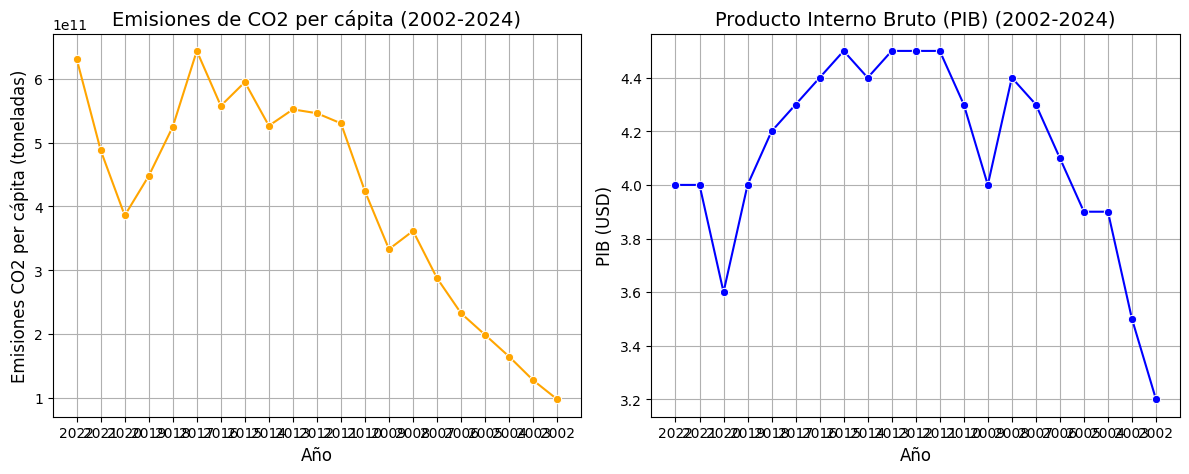

In [11]:
import matplotlib.pyplot as plt  
import seaborn as sns  

# Creacion de figura con subgráficas  
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas  

# Gráfico para PIB  
sns.lineplot(data=df_combined, x='Año', y='PIB', marker='o', color='orange', ax=axs[0])  
axs[1].set_title('Producto Interno Bruto (PIB) (2002-2024)', fontsize=14)  
axs[1].set_xlabel('Año', fontsize=12)  
axs[1].set_ylabel('PIB (USD)', fontsize=12)  
axs[1].grid(True)  

# Gráfico para Emisiones de CO2 per cápita  
sns.lineplot(data=df_combined, x='Año', y='Emisiones_CO2_PC', marker='o', color='blue', ax=axs[1])  
axs[0].set_title('Emisiones de CO2 per cápita (2002-2024)', fontsize=14)  
axs[0].set_xlabel('Año', fontsize=12)  
axs[0].set_ylabel('Emisiones CO2 per cápita (toneladas)', fontsize=12)  
axs[0].grid(True) 

# Ajusto el layout  
plt.tight_layout()  
plt.show()  

___

#### Parte 2:
Aquí volvemos a las consignas definidas: vamos a utilizar un informe de ANSES (en formato PDF) así como información disponible en el sitio web de ANSES para resolver los siguientes problemas.

5. (10 puntos) Generar un código que les permita extraer la tabla de número personas con beneficios de desempleo de este informe de ANSES en formato PDF y generar un dataframe de Pandas. Para ello pueden usar la librería `tabula-py` que vimos en clase. Los valores numéricos deben quedar en un tipo de dato numérico.

In [ ]:
pip install tabula-py==2.7.0
pip install pymupdf

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
import tabula

In [13]:
# Cargo la tabla de la Pag. 21
header = ["Provincia", "Beneficios", "%"]
perimetro = (3.3*72, 1.02*72, 9.2*72, 4.95*72)
columnas = sorted((2.74*72, 4.06*72))

lst_of_df = tabula.read_pdf('ANSES_informe.pdf', output_format='dataframe',
                            pages=21, area = perimetro, columns = columnas)

df_beneficios = lst_of_df[0]
df_beneficios.columns = header
df_beneficios

,Provincia,Beneficios,%
0,Buenos Aires,45.477,37%
1,Santa Fe,8.608,7%
2,Córdoba,7.770,6%
3,CABA,6.014,5%
4,San Juan,4.866,4%
5,Mendoza,4.691,4%
6,Santiago del Estero,4.294,3%
7,Entre Ríos,3.798,3%
8,Tucumán,3.673,3%
9,Salta,3.494,3%


In [14]:
print(df_beneficios.dtypes)

Provincia      object
Beneficios    float64
%              object
dtype: object


In [15]:
import pandas as pd

# Transformo el DataFrame
df_beneficios = lst_of_df[0]  # Extraigo el pdf
df_beneficios['Beneficios'] = df_beneficios['Beneficios'].apply(lambda x: str(x).replace('.', '').replace(',', '.'))  #eliminar puntos
df_beneficios['Beneficios'] = pd.to_numeric(df_beneficios['Beneficios'], errors='coerce')  #convertir beneficios a numero
df_beneficios['%'] = df_beneficios['%'].replace({'%': ''}, regex=True)  #eliminar %
df_beneficios['%'] = pd.to_numeric(df_beneficios['%'], errors='coerce')  #convertir a numero
df_beneficios.loc[df_beneficios['Provincia'] == 'La Pampa', 'Beneficios'] = df_beneficios.loc[df_beneficios['Provincia'] == 'La Pampa', 'Beneficios'] / 10  #corregir eror La Pampa

# Recaculo los porcentajes para tener mayor precision
total_beneficios_final = df_beneficios.loc[df_beneficios['Provincia'] == 'Total', 'Beneficios'].values[0]
df_beneficios.loc[df_beneficios['Provincia'] != 'Total', '%'] = df_beneficios['Beneficios'] / total_beneficios_final  

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1980\3988712202.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.36816029 0.0696863  0.00629022 0.0486865  0.03939284 0.03797612
 0.03476219 0.03074681 0.02973487 0.02828577 0.02775147 0.0027201
 0.02359846 0.02287796 0.02192269 0.02006072 0.00191054 0.01615058
 0.01446671 0.01404574 0.00131957 0.00118195 0.01143088 0.00603926]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_beneficios.loc[df_beneficios['Provincia'] != 'Total', '%'] = df_beneficios['Beneficios'] / total_beneficios_final


In [16]:
df_beneficios

,Provincia,Beneficios,%
0,Buenos Aires,45477,0.368160
1,Santa Fe,8608,0.069686
2,Córdoba,777,0.006290
3,CABA,6014,0.048687
4,San Juan,4866,0.039393
5,Mendoza,4691,0.037976
6,Santiago del Estero,4294,0.034762
7,Entre Ríos,3798,0.030747
8,Tucumán,3673,0.029735
9,Salta,3494,0.028286


6. (10 puntos) Usando los datos anteriores, generar un mapa coloreado de las provincias de Argentina, donde las provincias con más desempleo estén en tonos de rojo y las provincias con menor desempleo estén en tonos de azul.

In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [18]:
# Genero mapa de desempleo
df_poblacion = pd.read_excel("poblacion.xls")

In [19]:
# Reemplazo nombres de provincias en df_beneficios
df_poblacion['Provincia'] = df_poblacion['Provincia'].replace({
    'Ciudad Autónoma de Buenos Aires': 'CABA',
    'Tierra del Fuego, Antártida e Islas del Atlántico Sur': 'Tierra del Fuego'
})

In [20]:
df_poblacion

,Provincia,Poblacion
0,CABA,3121707
1,Buenos Aires,17523996
2,Catamarca,429562
3,Chaco,1129606
4,Chubut,592621
5,Córdoba,3840905
6,Corrientes,1212696
7,Entre Ríos,1425578
8,Formosa,607419
9,Jujuy,811611


In [21]:

# Fusiono df_beneficios con df_poblacion por 'Provincia'
df_beneficios = df_beneficios.merge(df_poblacion, on='Provincia', how='left')

In [22]:
df_beneficios

,Provincia,Beneficios,%,Poblacion
0,Buenos Aires,45477,0.368160,17523996.0
1,Santa Fe,8608,0.069686,3544908.0
2,Córdoba,777,0.006290,3840905.0
3,CABA,6014,0.048687,3121707.0
4,San Juan,4866,0.039393,822853.0
5,Mendoza,4691,0.037976,2043540.0
6,Santiago del Estero,4294,0.034762,1060906.0
7,Entre Ríos,3798,0.030747,1425578.0
8,Tucumán,3673,0.029735,1731820.0
9,Salta,3494,0.028286,1441351.0


In [23]:
# Normalizo los datos de desempleo
# Aseguro de manejar posibles valores nulos en 'Beneficios' y 'poblacion_2022'
df_beneficios['Poblacion'] = df_beneficios['Poblacion'].fillna(0)  # Reemplazar nulos si es necesario
df_beneficios['Desempleo Normalizado'] = df_beneficios['Beneficios'] / df_beneficios['Poblacion']

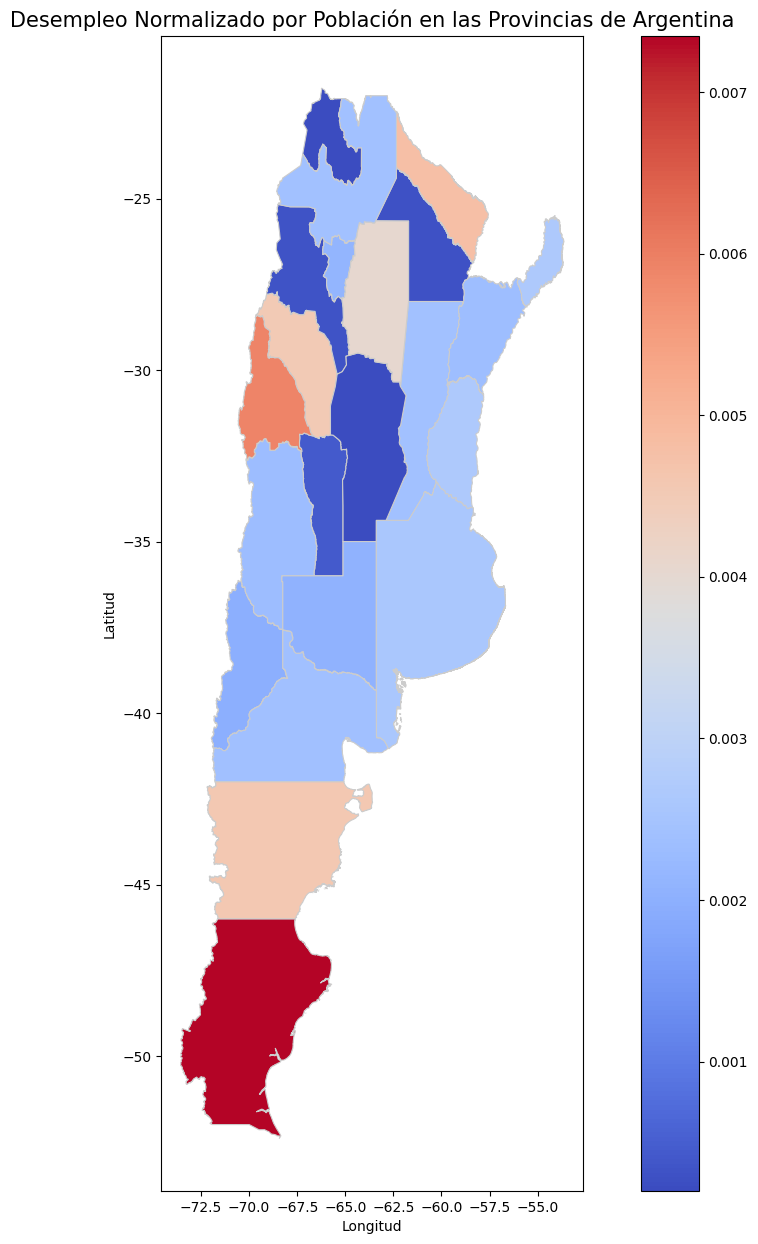

In [24]:
# Cargo el archivo JSON de las provincias de Argentina
provincias_gdf = gpd.read_file("provincia.json")  # Asegúrate de que este archivo esté en la ubicación correcta

# Fusiono los datos de desempleo con el GeoDataFrame de provincias
provincias_gdf = provincias_gdf.merge(df_beneficios[['Provincia', 'Desempleo Normalizado']], 
                                       left_on='nam', right_on='Provincia', 
                                       how='left')

# Creacion del mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 15))  # Tamaño del mapa
provincias_gdf.plot(column='Desempleo Normalizado', cmap='coolwarm', 
                    linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)  # Colores

# Título y etiquetas
plt.title('Desempleo Normalizado por Población en las Provincias de Argentina', 
          fontdict={'fontsize': '15', 'fontweight': '3'})
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Muestro el mapa
plt.show()


7. (20 puntos) Ahora utilicemos los datos de la siguiente página de ANSES: https://www.anses.gob.ar/oficinas-atencion-al-publico, donde detalla las ubicaciones de las oficinas de atención al público de ANSES. Los datos se muestran en una tabla, la cual está paginada de 1 a 8.

Nos encontramos con los siguientes desafíos: si prueban, van a notar que el sitio de ANSES no permite realizar consultas programáticas usando la librería `requests`, como veníamos haciendo. Por esa razón, vamos a tener que cambiar el enfoque: vamos a guardar el archivo HTML de la página localmente, y utilizar BeautifulSoup directamente en el contenido de este archivo (en lugar de hacer un `requests.get` a internet). El otro desafío es que el código HTML cambia con cada página. Deberán guardar un archivo HTML por cada una de las 8 páginas.

Finalmente, iteren sobre estos 8 archivos, extrayendo una a una las tablas. Finalmente, concatenaremos los resultados para generar un único dataframe con la información de todas las oficinas en cada fila.

In [25]:
import pandas as pd
from bs4 import BeautifulSoup
import glob

In [26]:

# Listo para almacenar los DataFrames de cada página
dataframes = []

for i in range(1, 9):
    with open(f'C:\\Users\\Usuario\\Desktop\\GitHub-Luis\\TP6-PYTHON\\html\\pagina{i}.html', 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'html.parser')
        
        # Encuentra la tabla (ajusta el selector según sea necesario)
        table = soup.find('table')  # Suponiendo que hay una sola tabla
        
        # Extrae los encabezados
        headers = [header.text.strip() for header in table.find_all('th')]
        
        # Extrae las filas de la tabla
        rows = []
        for row in table.find_all('tr')[1:]:  # Saltar el encabezado
            cols = [col.text.strip() for col in row.find_all('td')]
            rows.append(cols)
        
        # Crea un DataFrame para esta página
        df = pd.DataFrame(rows, columns=headers)
        dataframes.append(df)

# Concateno todos los DataFrames en uno solo
df_oficinas = pd.concat(dataframes, ignore_index=True)

In [27]:
df_oficinas 

,Provincia,Localidad,Nombre,Dirección,Horario,Ubicacion
0,Buenos Aires,25 de Mayo,25 de Mayo,Calle 10 Nº 1145,08.30 a 14.30hs,Ver en mapa
1,Buenos Aires,9 de Julio,9 de Julio,Libertad 1102,08.30 a 14.30hs,Ver en mapa
2,Buenos Aires,Alberti,Alberti,10 de junio 167,08.30 a 14.30hs,Ver en mapa
3,Buenos Aires,Alejandro Korn,Alejandro Korn,Av. Presidente Juan Domingo Perón 4550,08.30 a 14.30hs,Ver en mapa
4,Buenos Aires,Ameghino,Ameghino,Sarmiento 414 (Calle 5) e/ 32 y34,08.30 a 14.30hs,Ver en mapa
...,...,...,...,...,...,...
384,Tucumán,Concepción de Tucumán,Concepción,24 de Septiembre 1308,08.00 a 14.00hs,Ver en mapa
385,Tucumán,Monteros,Monteros,Marco Alurralde 187,08.00 a 14.00hs,Ver en mapa
386,Tucumán,San Isidro de Lules,San Isidro de Lules,Alte. Brown 106,08.00 a 14.00hs,Ver en mapa
387,Tucumán,San Miguel de Tucumán,Tucumán,Córdoba 498,08.00 a 14.00hs,Ver en mapa


In [28]:
##### AÑADIENDO OTRA FORMA DE EXTRAER LOS DATOS#########################################

In [31]:
import os
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from io import StringIO

In [32]:
# Fijo el directorio donde se guardarán los archivos HTML
output_dir = 'ejercicio_7_datos'
os.makedirs(output_dir, exist_ok=True)

# Configuro Selenium para usar Chrome
driver = webdriver.Chrome()  

# URL de la página de ANSES
url = 'https://www.anses.gob.ar/oficinas-atencion-al-publico'

# Abro la página principal
driver.get(url)

# Lista para almacenar DataFrames
dataframes = []

# Itera a través de las 8 páginas
for i in range(1, 9):
    
    time.sleep(3)
    
    # Extrae la tabla y conviértela en DataFrame
    table_html = driver.find_element(By.TAG_NAME, 'table').get_attribute('outerHTML')
    
    # Usar StringIO para evitar el FutureWarning
    table_data = StringIO(table_html)
    df = pd.read_html(table_data)[0]
    dataframes.append(df)
    
    # Guarda el HTML de la página actual
    with open(os.path.join(output_dir, f'anses_page_{i}.html'), 'w', encoding='utf-8') as file:
        file.write(driver.page_source)
    
    # Ir a la siguiente página si no es la última
    if i < 8:
        driver.find_element(By.LINK_TEXT, str(i + 1)).click()

# Cierra el navegador
driver.quit()

# Concateno todos los DataFrames en uno solo
final_df = pd.concat(dataframes, ignore_index=True)

# Guardo el resultado en un archivo CSV
final_df.to_csv('anses_oficinas.csv', index=False)

print("Proceso completado. Los datos han sido guardados en 'anses_oficinas.csv'.")


Proceso completado. Los datos han sido guardados en 'anses_oficinas.csv'.


In [33]:
final_df

,Provincia,Localidad,Nombre,Dirección,Horario,Ubicacion
0,Buenos Aires,25 de Mayo,25 de Mayo,Calle 10 Nº 1145,08.30 a 14.30hs,Ver en mapa
1,Buenos Aires,9 de Julio,9 de Julio,Libertad 1102,08.30 a 14.30hs,Ver en mapa
2,Buenos Aires,Alberti,Alberti,10 de junio 167,08.30 a 14.30hs,Ver en mapa
3,Buenos Aires,Alejandro Korn,Alejandro Korn,Av. Presidente Juan Domingo Perón 4550,08.30 a 14.30hs,Ver en mapa
4,Buenos Aires,Ameghino,Ameghino,Sarmiento 414 (Calle 5) e/ 32 y34,08.30 a 14.30hs,Ver en mapa
...,...,...,...,...,...,...
384,Tucumán,Concepción de Tucumán,Concepción,24 de Septiembre 1308,08.00 a 14.00hs,Ver en mapa
385,Tucumán,Monteros,Monteros,Marco Alurralde 187,08.00 a 14.00hs,Ver en mapa
386,Tucumán,San Isidro de Lules,San Isidro de Lules,Alte. Brown 106,08.00 a 14.00hs,Ver en mapa
387,Tucumán,San Miguel de Tucumán,Tucumán,Córdoba 498,08.00 a 14.00hs,Ver en mapa


8. (20 puntos) Ahora obtengamos información georreferenciada de las oficinas de ANSES. Para ello hay dos caminos:

- a) podemos usar la API de domicilios vista en la clase 6, pasarle las direcciones de la tabla generada en el punto anterior, y obtener la latitud y longitud de tantas oficinas como puedan.
- b) Alternativamente, notar que el texto "Ver el mapa" de la página apunta a un link de Google Maps que tiene incluidas la latitud y longitud (en la mayoria de los casos, en unos pocos el link no contiene esta información y a esos pueden descartarlos); por lo tanto, pueden también parsear el código HTML de las páginas (por ejemplo, con expresiones regulares, aunque no es la única forma) para así extraer estos valores. Finalmente, teniendo la latitud y longitud, crear una columna de `geometry` como hicimos en el caso de las propiedades del TP5, y con esto generar un Geodataframe.

_Ayuda para el camino b): pueden leer el contenido del HTML como texto plano con `.read()` y usar el método de strings `.split`. Notar que la parte de los links contiene una tag `href` que pueden usar para partir el string completo._

In [34]:
import pandas as pd  
import re  
from bs4 import BeautifulSoup  

data_frames = []  # Creacion de una lista vacía  

for page_num in range(1, 9):  # Iterar sobre las 8 páginas  
    with open(f'C:\\Users\\Usuario\\Desktop\\GitHub-Luis\\TP6-PYTHON\\html\\pagina{page_num}.html', 'r', encoding='utf-8') as file:  # Abrir HTML  
        soup = BeautifulSoup(file, 'html.parser')  # Leer el contenido  

        # Extraer la tabla  
        table = soup.find('table')  # Única tabla  

        if table is None:  # Comprobar si la tabla existe  
            print(f"No se encontró la tabla en la página {page_num}")  
            continue  

        headers = [th.text.strip() for th in table.find_all('th')]  # Extraer encabezados  

        rows = []  # Extraer las filas  
        for tr in table.find_all('tr')[1:]:  
            cells = tr.find_all('td')  
            row = [cell.text.strip() for cell in cells]  

            # Extraer el enlace de Google Maps  
            location_cell = tr.find_all('td')[-1]  
            link = location_cell.find('a', href=True)  
            if link:  
                url = link['href']  
                # Buscar latitud y longitud en el enlace  
                coords = re.search(r'q=(-?\d+\.\d+),(-?\d+\.\d+)', url)  
                if coords:  
                    lat, lon = coords.groups()  
                    row.extend([lat, lon])  
                else:  
                    row.extend([None, None])  
            else:  
                row.extend([None, None])  

            rows.append(row)  

        # Agregar columnas de latitud y longitud a los encabezados  
        headers.extend(['latitud', 'longitud'])  
        df = pd.DataFrame(rows, columns=headers)  # Datos extraídos  
        print(f"Página {page_num} - Filas extraídas: {len(rows)}")  # Para depuración  
        data_frames.append(df)  # Incorporar a la lista  

df_oficinas = pd.concat(data_frames, ignore_index=True)  # Concatenar DataFrames  

# Verifico el resultado final  
print(df_oficinas.head())  

Página 1 - Filas extraídas: 50
Página 2 - Filas extraídas: 50
Página 3 - Filas extraídas: 50
Página 4 - Filas extraídas: 50
Página 5 - Filas extraídas: 50
Página 6 - Filas extraídas: 50
Página 7 - Filas extraídas: 50
Página 8 - Filas extraídas: 39
      Provincia       Localidad          Nombre  \
0  Buenos Aires      25 de Mayo      25 de Mayo   
1  Buenos Aires      9 de Julio      9 de Julio   
2  Buenos Aires         Alberti         Alberti   
3  Buenos Aires  Alejandro Korn  Alejandro Korn   
4  Buenos Aires        Ameghino        Ameghino   

                                Dirección          Horario    Ubicacion  \
0                        Calle 10 Nº 1145  08.30 a 14.30hs  Ver en mapa   
1                           Libertad 1102  08.30 a 14.30hs  Ver en mapa   
2                         10 de junio 167  08.30 a 14.30hs  Ver en mapa   
3  Av. Presidente Juan Domingo Perón 4550  08.30 a 14.30hs  Ver en mapa   
4       Sarmiento 414 (Calle 5) e/ 32 y34  08.30 a 14.30hs  Ver en map

In [35]:
# Creacion de la columna "Coordenadas" con los valores de latitud y longitud  
df_oficinas['Coordenadas'] = df_oficinas.apply(  
    lambda row: (row['latitud'], row['longitud']) if pd.notnull(row['latitud']) and pd.notnull(row['longitud']) else None,  
    axis=1  
)  

# Reemplazo nombres de provincias en df_beneficios
df_oficinas.rename(columns={
    'Localidad': 'Departamento',
    'Nombre': 'Localidad'
}, inplace=True)

In [36]:
df_oficinas

,Provincia,Departamento,Localidad,Dirección,Horario,Ubicacion,latitud,longitud,Coordenadas
0,Buenos Aires,25 de Mayo,25 de Mayo,Calle 10 Nº 1145,08.30 a 14.30hs,Ver en mapa,-35.429473,-60.171813,"(-35.429473, -60.171813)"
1,Buenos Aires,9 de Julio,9 de Julio,Libertad 1102,08.30 a 14.30hs,Ver en mapa,-35.443995,-60.884364,"(-35.443995, -60.884364)"
2,Buenos Aires,Alberti,Alberti,10 de junio 167,08.30 a 14.30hs,Ver en mapa,-35.032430,-60.282217,"(-35.032430, -60.282217)"
3,Buenos Aires,Alejandro Korn,Alejandro Korn,Av. Presidente Juan Domingo Perón 4550,08.30 a 14.30hs,Ver en mapa,-34.989405,-58.381835,"(-34.989405, -58.381835)"
4,Buenos Aires,Ameghino,Ameghino,Sarmiento 414 (Calle 5) e/ 32 y34,08.30 a 14.30hs,Ver en mapa,-34.845296,-62.465633,"(-34.845296, -62.465633)"
...,...,...,...,...,...,...,...,...,...
384,Tucumán,Concepción de Tucumán,Concepción,24 de Septiembre 1308,08.00 a 14.00hs,Ver en mapa,-27.341566,-65.594666,"(-27.341566, -65.594666)"
385,Tucumán,Monteros,Monteros,Marco Alurralde 187,08.00 a 14.00hs,Ver en mapa,-27.162471,-65.498054,"(-27.162471, -65.498054)"
386,Tucumán,San Isidro de Lules,San Isidro de Lules,Alte. Brown 106,08.00 a 14.00hs,Ver en mapa,-26.924496,-65.332581,"(-26.924496, -65.332581)"
387,Tucumán,San Miguel de Tucumán,Tucumán,Córdoba 498,08.00 a 14.00hs,Ver en mapa,-26.827072,-65.203582,"(-26.827072, -65.203582)"


In [37]:
# Especifico la ruta del archivo Excel donde voy guardar el DataFrame  
output_file = 'C:\\Users\\Usuario\\Desktop\\GitHub-Luis\\TP6-PYTHON\\direccion_oficinas.xlsx'  

# Exporto el DataFrame a un archivo Excel que sera usado en el punto 9
df_oficinas.to_excel(output_file, index=False)  

print(f"El DataFrame ha sido exportado a {output_file}")

El DataFrame ha sido exportado a C:\Users\Usuario\Desktop\GitHub-Luis\TP6-PYTHON\direccion_oficinas.xlsx


9. (15 puntos) Finalmente, generar un widget que nos permita elegir la provincia, y nos muestre un mapa de la provincia con las ubicaciones de las oficinas de ANSES del punto anterior (el resultado de superponer dos o más datasets georreferenciados en un mapa es lo que se llama un _overlay_).

In [38]:
# Especifico la ruta del archivo Excel que he guardo en el ejercicio 9
input_file = 'C:/Users/Usuario/Desktop/GitHub-Luis/TP6-PYTHON/direccion_oficinas.xlsx'

# Importo el archivo Excel en un DataFrame
df_ubicaciones = pd.read_excel(input_file)

# Selecciono solo las columnas deseadas
df_ubicaciones = df_ubicaciones[['Provincia', 'Dirección', 'latitud', 'longitud']]

In [39]:
df_ubicaciones

,Provincia,Dirección,latitud,longitud
0,Buenos Aires,Calle 10 Nº 1145,-35.429473,-60.171813
1,Buenos Aires,Libertad 1102,-35.443995,-60.884364
2,Buenos Aires,10 de junio 167,-35.032430,-60.282217
3,Buenos Aires,Av. Presidente Juan Domingo Perón 4550,-34.989405,-58.381835
4,Buenos Aires,Sarmiento 414 (Calle 5) e/ 32 y34,-34.845296,-62.465633
...,...,...,...,...
384,Tucumán,24 de Septiembre 1308,-27.341566,-65.594666
385,Tucumán,Marco Alurralde 187,-27.162471,-65.498054
386,Tucumán,Alte. Brown 106,-26.924496,-65.332581
387,Tucumán,Córdoba 498,-26.827072,-65.203582


In [40]:

import folium  
from IPython.display import display  
import ipywidgets as widgets  


# Creacion de un widget de selección de provincia  
provincia_selector = widgets.Dropdown(  
    options=sorted(df_ubicaciones['Provincia'].unique()),  # Ordenar las provincias para mejor legibilidad  
    description='Provincia:',  
    disabled=False,  
)  

# Función para mostrar el mapa  
def mostrar_mapa(provincia):  
    # Filtrar las oficinas por provincia seleccionada  
    oficinas = df_ubicaciones[df_ubicaciones['Provincia'] == provincia]  
    
    # Crear un mapa centrado en la primera oficina de la provincia seleccionada  
    if not oficinas.empty:  
        mapa = folium.Map(location=[oficinas.iloc[0]['latitud'], oficinas.iloc[0]['longitud']], zoom_start=8)  

        # Añadir marcadores para cada oficina  
        for _, oficina in oficinas.iterrows():  
            folium.Marker(  
                location=[oficina['latitud'], oficina['longitud']],  
                popup=oficina['Dirección'],  # Muestra la dirección en el popup  
                icon=folium.Icon(color='blue')  
            ).add_to(mapa)  

        # Mostrar el mapa  
        display(mapa)  
    else:  
        print("No se encontraron oficinas para la provincia seleccionada.")  

# Coneccion del widget a la función  
widgets.interactive(mostrar_mapa, provincia=provincia_selector)

interactive(children=(Dropdown(description='Provincia:', options=('Buenos Aires', 'CABA', 'Catamarca', 'Chaco'…